# EDA - Exploratory Data Analysis - Level 1
### Food Delivery Order History Data
### Dataset Link - https://www.kaggle.com/datasets/sujalsuthar/food-delivery-order-history-data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Loading the data from drive

In [ ]:
order_history_df = pd.read_csv('/content/drive/MyDrive/order_history_kaggle_data.csv')

## Datasize Check

In [ ]:
#Datasize
order_history_df.shape

(21321, 29)

## Sample

In [ ]:
order_history_df.head(5)

,Restaurant ID,Restaurant name,Subzone,City,Order ID,Order Placed At,Order Status,Delivery,Distance,Items in order,...,Rating,Review,Cancellation / Rejection reason,Restaurant compensation (Cancellation),Restaurant penalty (Rejection),KPT duration (minutes),Rider wait time (minutes),Order Ready Marked,Customer complaint tag,Customer ID
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,"11:38 PM, September 10 2024",Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,"11:34 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,"03:52 PM, September 10 2024",Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,"03:45 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,4.0,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,"03:04 PM, September 10 2024",Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...


## All columns

In [ ]:
order_history_df.columns

Index(['Restaurant ID', 'Restaurant name', 'Subzone', 'City', 'Order ID',
       'Order Placed At', 'Order Status', 'Delivery', 'Distance',
       'Items in order', 'Instructions', 'Discount construct', 'Bill subtotal',
       'Packaging charges', 'Restaurant discount (Promo)',
       'Restaurant discount (Flat offs, Freebies & others)', 'Gold discount',
       'Brand pack discount', 'Total', 'Rating', 'Review',
       'Cancellation / Rejection reason',
       'Restaurant compensation (Cancellation)',
       'Restaurant penalty (Rejection)', 'KPT duration (minutes)',
       'Rider wait time (minutes)', 'Order Ready Marked',
       'Customer complaint tag', 'Customer ID'],
      dtype='object')

## Null Values & Percentage at column level

In [ ]:
#check null
order_history_df.isnull().sum()

,0
Restaurant ID,0
Restaurant name,0
Subzone,0
City,0
Order ID,0
Order Placed At,0
Order Status,0
Delivery,0
Distance,0
Items in order,0


In [ ]:
# Null values percentage
null_values = order_history_df.isnull().sum()
null_values_percentage = (null_values / len(order_history_df)) * 100
null_columns_data = pd.concat([null_values, null_values_percentage], axis=1)
null_columns_data.columns = ['Null_Counts', 'Percentage']
print("\nNull Columns Percentage:")
display(null_columns_data[null_columns_data['Null_Counts'] > 0].sort_values('Percentage', ascending=False))


Null Columns Percentage:


,Null_Counts,Percentage
restaurant_penalty_rejection,21318,99.985929
restaurant_compensation_cancellation,21188,99.376202
rating,18830,88.316683


## Categorical Columns unique values(less than 10 unique value columns)

In [ ]:
#categorical unique values
categorical_cols = order_history_df.select_dtypes(include=['object']).columns
print("\nUnique values in categorical columns:")
for col in categorical_cols:
    print("------"+str(col)+"------")
    print(f"{col}: {order_history_df[col].nunique()} unique values")
    if order_history_df[col].nunique() < 10:
        print(order_history_df[col].value_counts())
    print("-" * 50)


Unique values in categorical columns:
------Restaurant name------
Restaurant name: 6 unique values
Restaurant name
Aura Pizzas             14548
Swaad                    6332
Dilli Burger Adda         227
Tandoori Junction         154
The Chicken Junction       32
Masala Junction            28
Name: count, dtype: int64
--------------------------------------------------
------Subzone------
Subzone: 8 unique values
Subzone
Greater Kailash 2 (GK2)    7380
Sector 4                   6530
DLF Phase 1                3686
Sector 135                 2442
Vasant Kunj                 920
Shahdara                    360
Chittaranjan Park             2
Sikandarpur                   1
Name: count, dtype: int64
--------------------------------------------------
------City------
City: 1 unique values
City
Delhi NCR    21321
Name: count, dtype: int64
--------------------------------------------------
------Order Placed At------
Order Placed At: 19114 unique values
------------------------------------

Restaurant name: 6 unique values


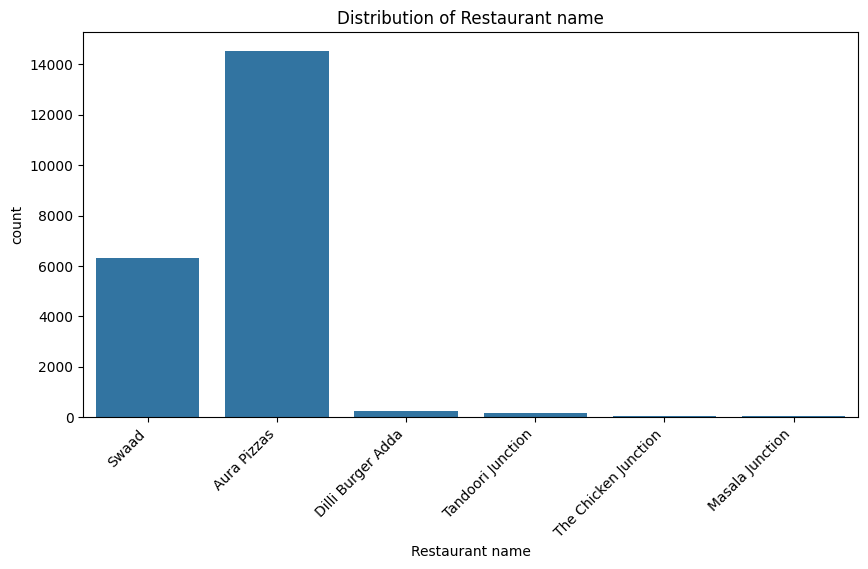

--------------------------------------------------
Subzone: 8 unique values


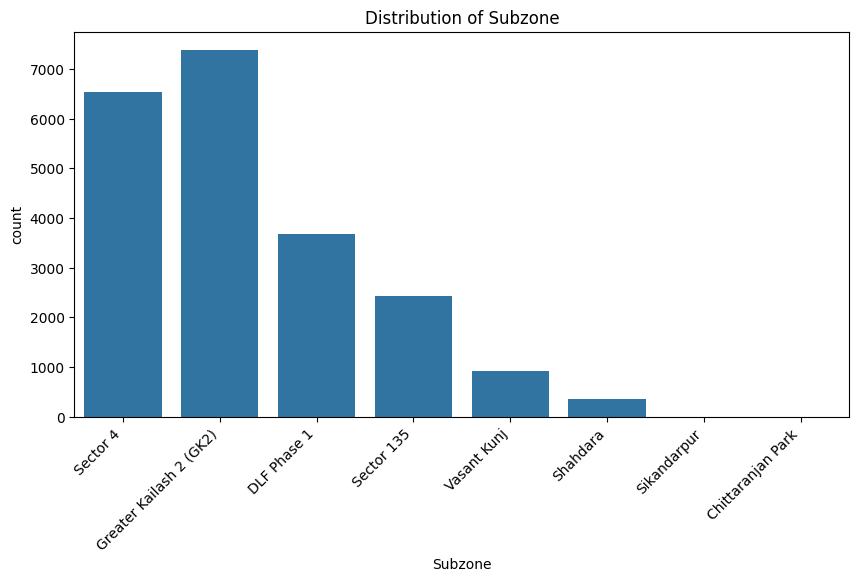

--------------------------------------------------
City: 1 unique values


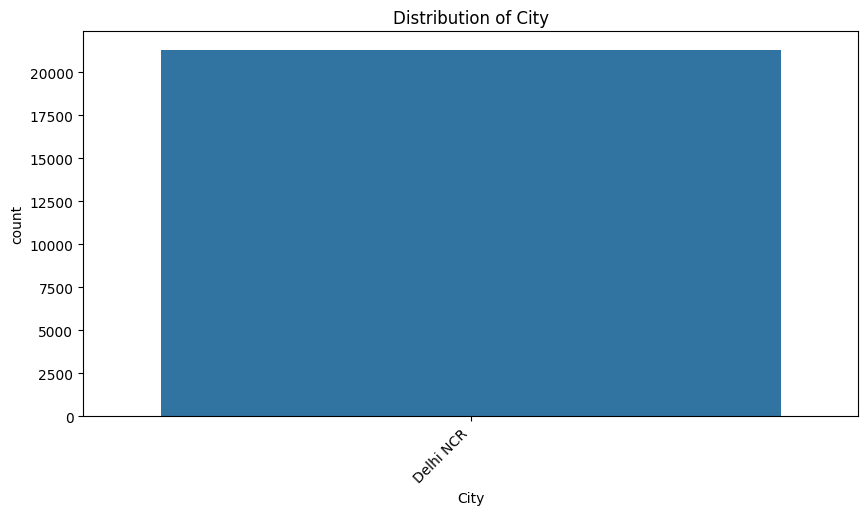

--------------------------------------------------
Order Placed At: 19114 unique values
Skipping plot for Order Placed At as it has more than 10 unique values.
--------------------------------------------------
Order Status: 6 unique values


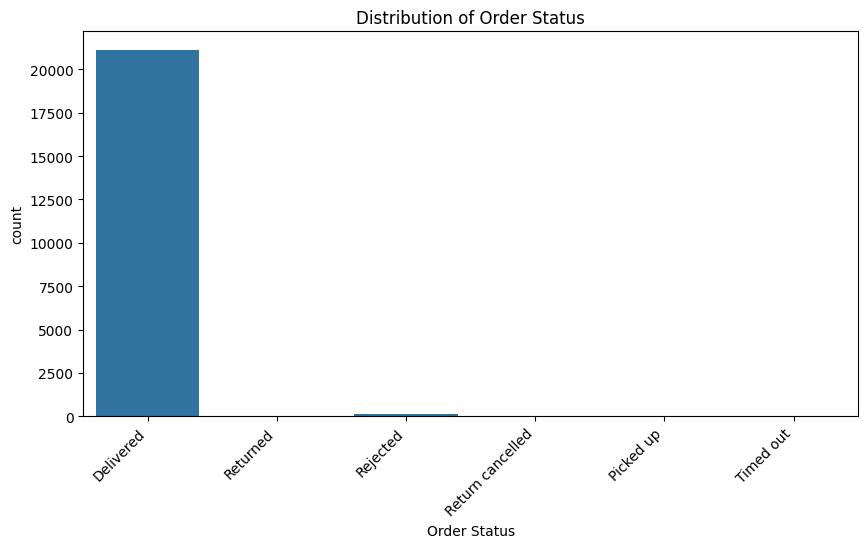

--------------------------------------------------
Delivery: 1 unique values


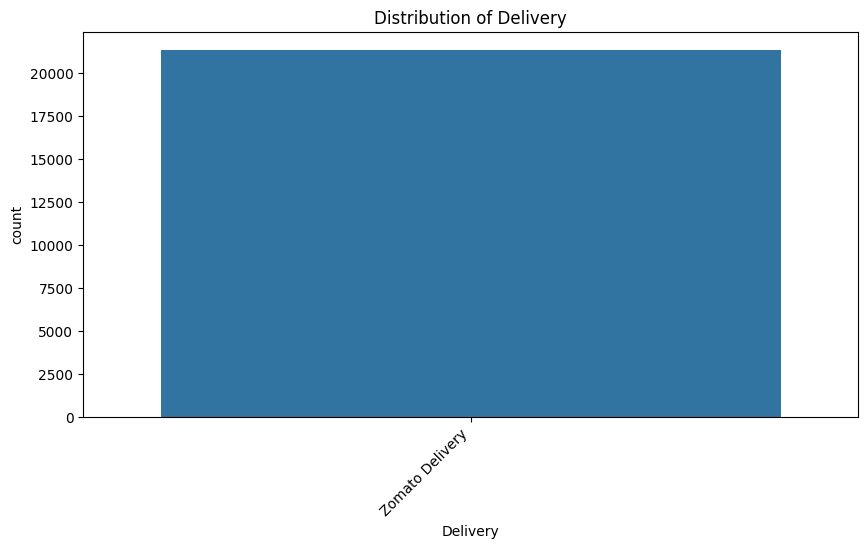

--------------------------------------------------
Distance: 22 unique values
Skipping plot for Distance as it has more than 10 unique values.
--------------------------------------------------
Items in order: 6123 unique values
Skipping plot for Items in order as it has more than 10 unique values.
--------------------------------------------------
Instructions: 631 unique values
Skipping plot for Instructions as it has more than 10 unique values.
--------------------------------------------------
Discount construct: 527 unique values
Skipping plot for Discount construct as it has more than 10 unique values.
--------------------------------------------------
Review: 293 unique values
Skipping plot for Review as it has more than 10 unique values.
--------------------------------------------------
Cancellation / Rejection reason: 5 unique values


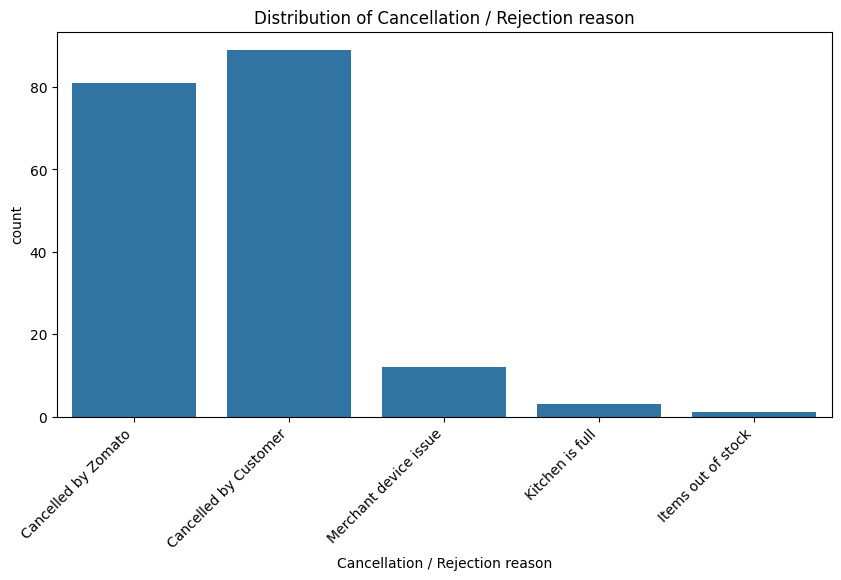

--------------------------------------------------
Order Ready Marked: 3 unique values


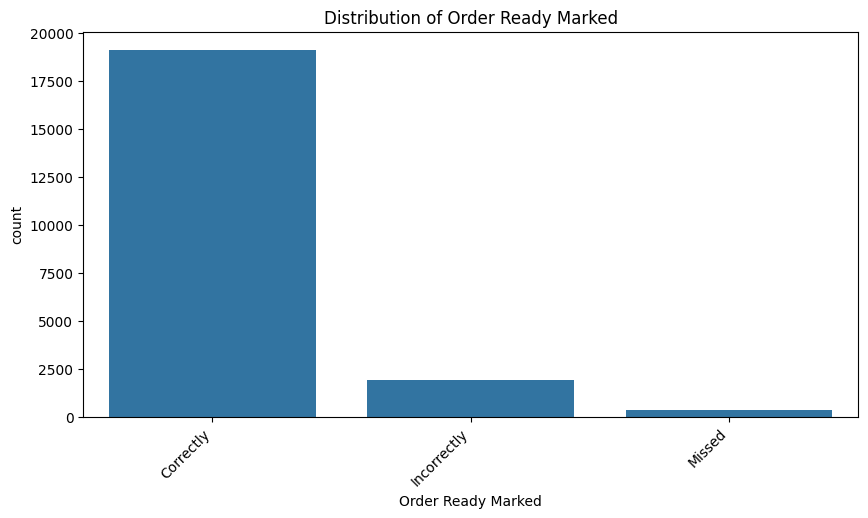

--------------------------------------------------
Customer complaint tag: 5 unique values


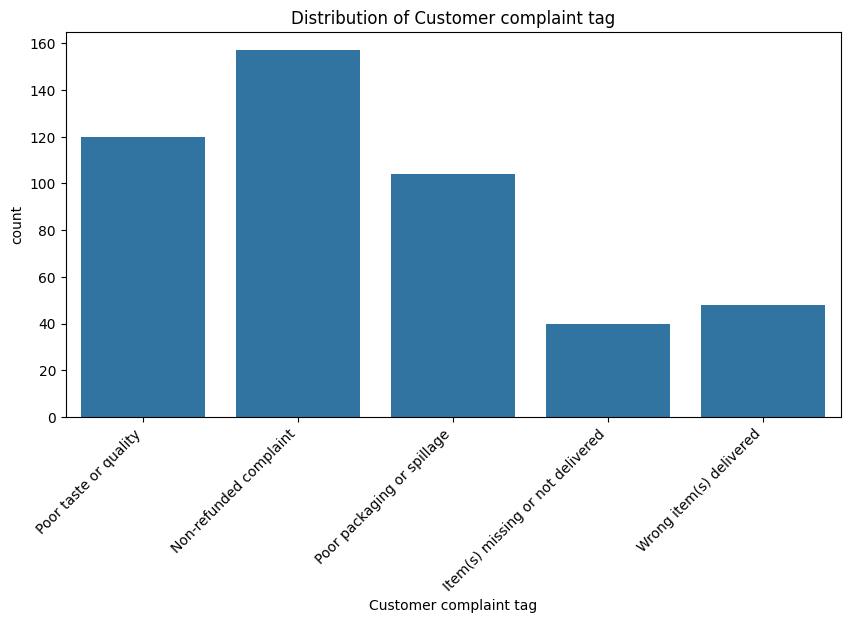

--------------------------------------------------
Customer ID: 11607 unique values
Skipping plot for Customer ID as it has more than 10 unique values.
--------------------------------------------------


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = order_history_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"{col}: {order_history_df[col].nunique()} unique values")

    #plot for columns with less than 10 unique values
    if order_history_df[col].nunique() < 10:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=order_history_df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45, ha='right')
        plt.show()
    else:
        print(f"Skipping plot for {col} as it has more than 10 unique values.")

    print("-" * 50)

## Refactoring column name

In [ ]:

import re

def clean_column_names(df):
    existing_columns = df.columns
    new_columns = [re.sub(r'[^a-zA-Z0-9_]', '_', col.replace(" ", "_").lower()) for col in existing_columns]
    new_columns = [re.sub(r'_{2,}', '_', col) for col in new_columns]
    new_columns = [col.rstrip('_') for col in new_columns]  # Remove trailing underscores
    df.columns = new_columns
    return df

order_history_df = clean_column_names(order_history_df)

In [ ]:
order_history_df.columns

Index(['restaurant_id', 'restaurant_name', 'subzone', 'city', 'order_id',
       'order_placed_at', 'order_status', 'delivery', 'distance',
       'items_in_order', 'instructions', 'discount_construct', 'bill_subtotal',
       'packaging_charges', 'restaurant_discount_promo',
       'restaurant_discount_flat_offs_freebies_others', 'gold_discount',
       'brand_pack_discount', 'total', 'rating', 'review',
       'cancellation_rejection_reason', 'restaurant_compensation_cancellation',
       'restaurant_penalty_rejection', 'kpt_duration_minutes',
       'rider_wait_time_minutes', 'order_ready_marked',
       'customer_complaint_tag', 'customer_id'],
      dtype='object')

## Formating date column

In [ ]:
from datetime import datetime

def convert_to_datetime(date_string):
    """Converts a date string in the format '1:38 PM, September 10 2024' to a datetime object."""
    try:
        return datetime.strptime(date_string, '%I:%M %p, %B %d %Y')
    except ValueError:
        print(f"Invalid date string format: {date_string}")
        return None  # or raise an exception if you prefer

# Apply the function to the 'order_date' column
order_history_df['order_placed_at'] = order_history_df['order_placed_at'].apply(convert_to_datetime)

In [ ]:
order_history_df.head(5)

,restaurant_id,restaurant_name,subzone,city,order_id,order_placed_at,order_status,delivery,distance,items_in_order,...,review,cancellation_rejection_reason,restaurant_compensation_cancellation,restaurant_penalty_rejection,kpt_duration_minutes,rider_wait_time_minutes,order_ready_marked,customer_complaint_tag,customer_id,item_count
0,20320607,Swaad,Sector 4,Delhi NCR,6168884918,2024-09-10 23:38:00,Delivered,Zomato Delivery,3km,"1 x Grilled Chicken Jamaican Tender, 1 x Grill...",...,NaN,NaN,NaN,NaN,18.35,11.6,Correctly,NaN,5d6c2b96db963098bc69768bea504c8bf46106a8a5178e...,2
1,20320607,Swaad,Sector 4,Delhi NCR,6170707559,2024-09-10 23:34:00,Delivered,Zomato Delivery,2km,"1 x Peri Peri Fries, 1 x Fried Chicken Angara ...",...,NaN,NaN,NaN,NaN,16.95,3.6,Correctly,NaN,0781815deb4a10a574e9fee4fa0b86b074d4a0b36175d5...,3
2,20320607,Swaad,Sector 4,Delhi NCR,6169375019,2024-09-10 15:52:00,Delivered,Zomato Delivery,<1km,1 x Bone in Peri Peri Grilled Chicken,...,NaN,NaN,NaN,NaN,14.05,12.2,Correctly,NaN,f93362f5ce5382657482d164e368186bcec9c6225fd93d...,1
3,20320607,Swaad,Sector 4,Delhi NCR,6151677434,2024-09-10 15:45:00,Delivered,Zomato Delivery,2km,"1 x Fried Chicken Ghostbuster Tender, 1 x Anga...",...,NaN,NaN,NaN,NaN,19.00,3.3,Correctly,NaN,1ed226d1b8a5f7acee12fc1d6676558330a3b2b742af5d...,2
4,20320607,Swaad,Sector 4,Delhi NCR,6167540897,2024-09-10 15:04:00,Delivered,Zomato Delivery,2km,"1 x Peri Peri Krispers, 1 x Fried Chicken Anga...",...,NaN,NaN,NaN,NaN,15.97,1.0,Correctly,NaN,d21a2ac6ea06b31cc3288ab20c4ef2f292066c096f2c5f...,2


## Extraction of item counts from the items column

In [ ]:
import re
import pandas as pd

def extract_item_count(items_str):
    """Extracts the total item count from a string like '2 x itemA, 1 x itemB'."""
    if pd.isna(items_str) or items_str == "":
        return 0

    # Find all patterns like "X x Item"
    matches = re.findall(r'(\d+)\s*x\s*', items_str, re.IGNORECASE)

    # Sum up all quantities, handling potential errors
    count = 0
    for match in matches:
        try:
            count += int(match)
        except ValueError:
            print(f"Warning: Could not convert '{match}' to an integer.")

    return count

# Assuming your DataFrame is called 'order_history_df' and the items column is 'items_column'
order_history_df['item_count'] = order_history_df['items_in_order'].apply(extract_item_count)

## Handling Missing values less than 500 counts

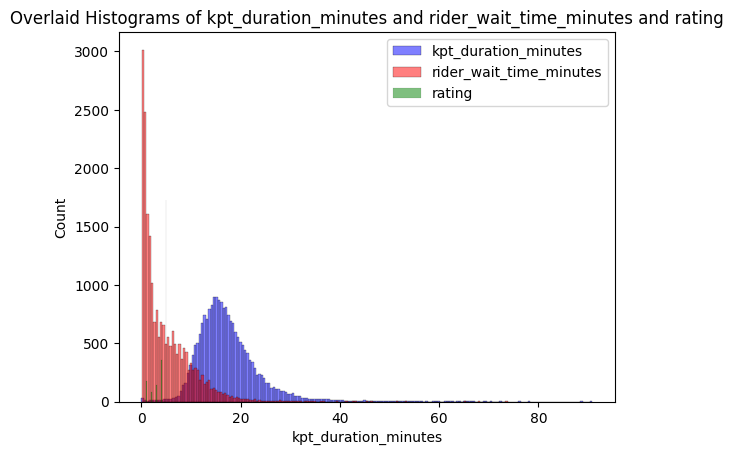

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=order_history_df, x='kpt_duration_minutes', color='blue', label='kpt_duration_minutes', alpha=0.5)
sns.histplot(data=order_history_df, x='rider_wait_time_minutes', color='red', label='rider_wait_time_minutes', alpha=0.5)
sns.histplot(data=order_history_df, x='rating', color='green', label='rating', alpha=0.5)
plt.title('Overlaid Histograms of kpt_duration_minutes and rider_wait_time_minutes and rating')
plt.legend()
plt.show()

<Axes: xlabel='rider_wait_time_minutes', ylabel='Count'>

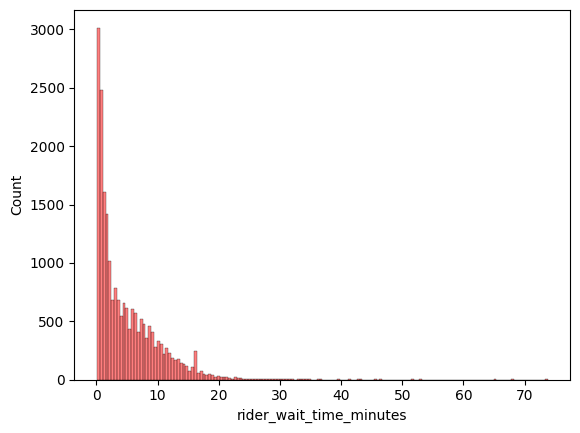

In [ ]:
sns.histplot(data=order_history_df, x='rider_wait_time_minutes', color='red', label='rider_wait_time_minutes', alpha=0.5)


<Axes: xlabel='rating', ylabel='Count'>

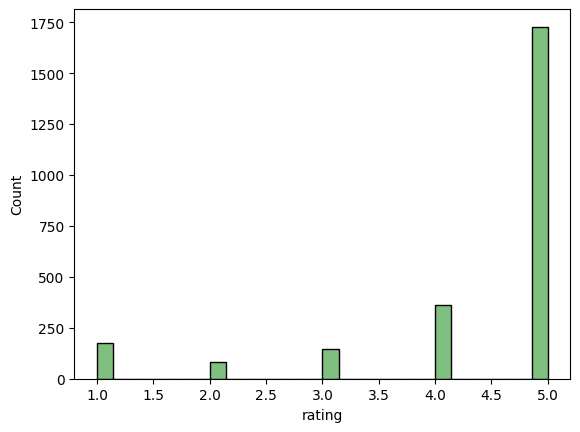

In [ ]:
sns.histplot(data=order_history_df, x='rating', color='green', label='rating', alpha=0.5)

<Axes: xlabel='kpt_duration_minutes', ylabel='Count'>

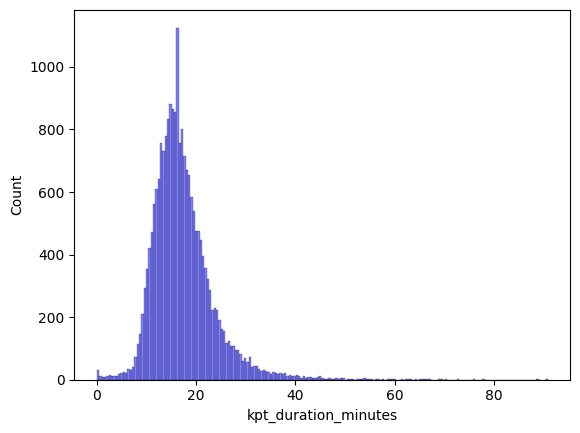

In [ ]:
sns.histplot(data=order_history_df, x='kpt_duration_minutes', color='blue', label='kpt_duration_minutes', alpha=0.5)

In [ ]:
# Calculate the median of the specific column
kpt_duration_minutes_median = order_history_df['kpt_duration_minutes'].median()
print(kpt_duration_minutes_median)

# Replace null values in the specific column with the median
order_history_df['kpt_duration_minutes'] = order_history_df['kpt_duration_minutes'].fillna(kpt_duration_minutes_median)

16.33


In [ ]:
# Calculate the median of the specific column
rider_wait_time_minutes_median = order_history_df['rider_wait_time_minutes'].median()
print(rider_wait_time_minutes_median)

# Replace null values in the specific column with the median
order_history_df['rider_wait_time_minutes'] = order_history_df['rider_wait_time_minutes'].fillna(rider_wait_time_minutes_median)

3.1


## Formating string(alphaets with numbers-->1km) distance column

In [ ]:
def clean_distance(distance_str):
    if pd.isna(distance_str):
        return np.nan
    elif '<' in distance_str:
        return 0.5  # assuming <1km means approximately 0.5km
    else:
        # Extract the numeric part
        return float(distance_str.replace('km', ''))

order_history_df['distance'] = order_history_df['distance'].apply(clean_distance)


## Filling categorical missing values

In [ ]:
# Assuming 'order_history_df' is your DataFrame
categorical_cols = order_history_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    missing_count = order_history_df[col].isnull().sum()
    if missing_count > 0:
        print(f"Column '{col}' has {missing_count} missing values.")

Column 'instructions' has 20601 missing values.
Column 'discount_construct' has 5498 missing values.
Column 'review' has 21025 missing values.
Column 'cancellation_rejection_reason' has 21135 missing values.
Column 'customer_complaint_tag' has 20852 missing values.


In [ ]:
def fill_categorical_missing(df, column_name):
    """Fills missing values in a categorical column with 'No' + column name."""
    df[column_name] = df[column_name].fillna(f"No_{column_name}")
    return df

# Assuming 'order_history_df' is your DataFrame and 'categorical_column' is a column name
order_history_df = fill_categorical_missing(order_history_df, 'instructions')
order_history_df = fill_categorical_missing(order_history_df, 'discount_construct')
order_history_df = fill_categorical_missing(order_history_df, 'review')
order_history_df = fill_categorical_missing(order_history_df, 'cancellation_rejection_reason')
order_history_df = fill_categorical_missing(order_history_df, 'customer_complaint_tag')

## Outliers

In [ ]:
numerical_cols = order_history_df.select_dtypes(include=['number']).columns
print(numerical_cols)

Index(['restaurant_id', 'order_id', 'distance', 'bill_subtotal',
       'packaging_charges', 'restaurant_discount_promo',
       'restaurant_discount_flat_offs_freebies_others', 'gold_discount',
       'brand_pack_discount', 'total', 'rating',
       'restaurant_compensation_cancellation', 'restaurant_penalty_rejection',
       'kpt_duration_minutes', 'rider_wait_time_minutes', 'item_count'],
      dtype='object')


### Method 1

In [ ]:
import pandas as pd
import numpy as np

def find_outliers_per_column(df):
    """
    Finds outliers in each column of a pandas DataFrame using the IQR method.
    Displays the outlier columns in the format: Column 'column_name': number outliers dropped.
    Includes a total outlier dropped count at the end.

    Args:
        df (pd.DataFrame): The input DataFrame.

    Returns:
        pd.DataFrame: The DataFrame with outliers removed.
    """

    df_clean = df.copy()
    total_dropped = 0  # Initialize total dropped count

    for col in df_clean.select_dtypes(include=['number']).columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identify and drop outliers
        outlier_indices = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)].index
        num_outliers = len(outlier_indices)
        df_clean.drop(index=outlier_indices, inplace=True)
        total_dropped += num_outliers  # Accumulate total dropped count

        print(f"Column '{col}': {num_outliers} outliers dropped.")  # Display in desired format

    print(f"Total outliers dropped from DataFrame: {total_dropped}")  # Display total dropped count
    return df_clean

# Example usage:
order_history_df_clean = find_outliers_per_column(order_history_df.copy())

Column 'restaurant_id': 0 outliers dropped.
Column 'order_id': 0 outliers dropped.
Column 'distance': 24 outliers dropped.
Column 'bill_subtotal': 282 outliers dropped.
Column 'packaging_charges': 33 outliers dropped.
Column 'restaurant_discount_promo': 1 outliers dropped.
Column 'restaurant_discount_flat_offs_freebies_others': 1810 outliers dropped.
Column 'gold_discount': 27 outliers dropped.
Column 'brand_pack_discount': 789 outliers dropped.
Column 'total': 2 outliers dropped.
Column 'rating': 0 outliers dropped.
Column 'restaurant_compensation_cancellation': 2 outliers dropped.
Column 'restaurant_penalty_rejection': 0 outliers dropped.
Column 'kpt_duration_minutes': 154 outliers dropped.
Column 'rider_wait_time_minutes': 38 outliers dropped.
Column 'item_count': 177 outliers dropped.
Total outliers dropped from DataFrame: 3339


### Method 2

In [ ]:
import pandas as pd
import numpy as np

def remove_outliers_zscore(df, columns, threshold=3):
    """
    Removes outliers from specified columns of a pandas DataFrame using the z-score method.
    Displays the number of outliers dropped for each column and the total number dropped.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to check for outliers.
        threshold (float, optional): The z-score threshold for outlier detection. Defaults to 3.

    Returns:
        pd.DataFrame: A new DataFrame with outliers removed.
    """

    df_clean = df.copy()
    total_dropped = 0  # Initialize total dropped count

    for col in columns:
        original_size = len(df_clean)
        z_scores = np.abs((df_clean[col] - df_clean[col].mean()) / df_clean[col].std())
        df_clean = df_clean[z_scores <= threshold]
        dropped_count = original_size - len(df_clean)
        total_dropped += dropped_count  # Accumulate total dropped count
        print(f"Column '{col}': {dropped_count} outliers dropped.")

    print(f"Total outliers dropped from DataFrame: {total_dropped}")
    return df_clean

# Example usage:
numerical_cols = order_history_df.select_dtypes(include=['number']).columns
order_history_df_clean = remove_outliers_zscore(order_history_df, numerical_cols, threshold=3)

Column 'restaurant_id': 28 outliers dropped.
Column 'order_id': 0 outliers dropped.
Column 'distance': 314 outliers dropped.
Column 'bill_subtotal': 262 outliers dropped.
Column 'packaging_charges': 323 outliers dropped.
Column 'restaurant_discount_promo': 284 outliers dropped.
Column 'restaurant_discount_flat_offs_freebies_others': 654 outliers dropped.
Column 'gold_discount': 27 outliers dropped.
Column 'brand_pack_discount': 625 outliers dropped.
Column 'total': 166 outliers dropped.
Column 'rating': 16527 outliers dropped.
Column 'restaurant_compensation_cancellation': 2111 outliers dropped.
Column 'restaurant_penalty_rejection': 0 outliers dropped.
Column 'kpt_duration_minutes': 0 outliers dropped.
Column 'rider_wait_time_minutes': 0 outliers dropped.
Column 'item_count': 0 outliers dropped.
Total outliers dropped from DataFrame: 21321


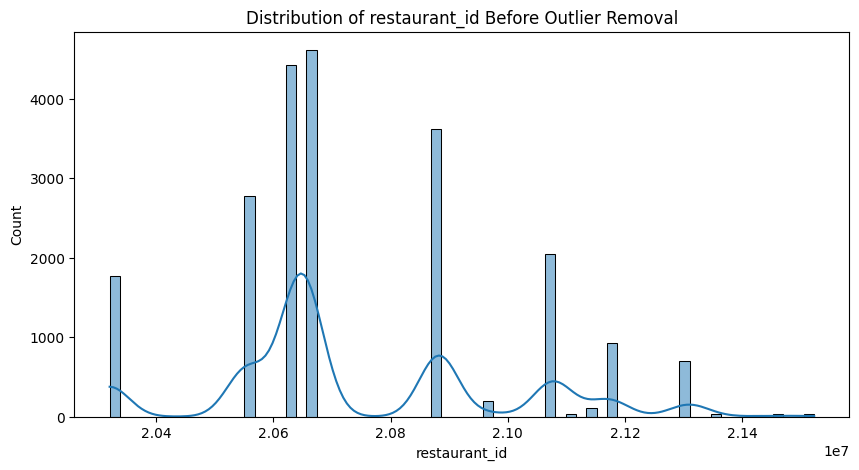

Column 'restaurant_id': 28 outliers dropped.


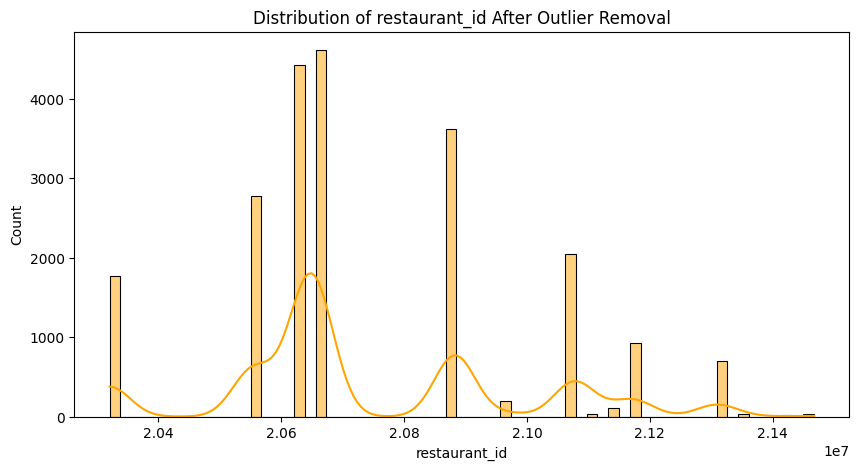

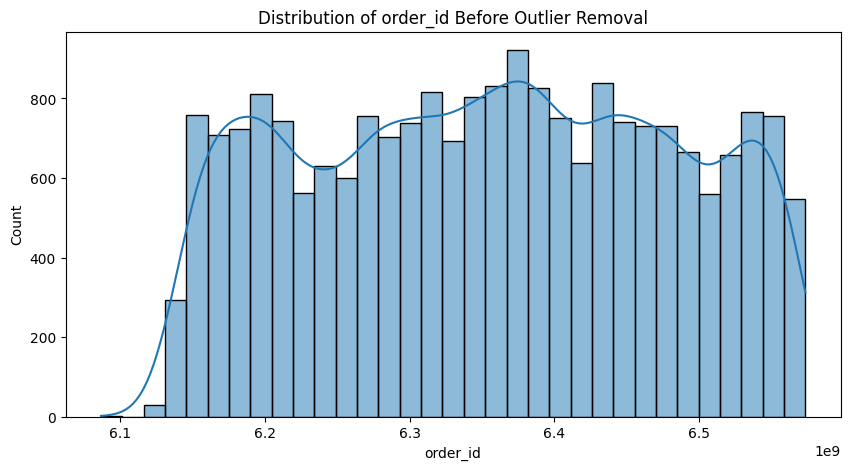

Column 'order_id': 0 outliers dropped.


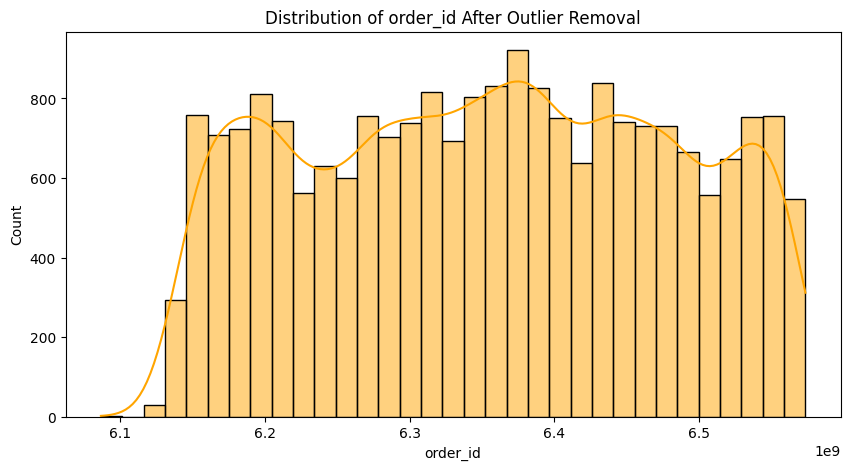

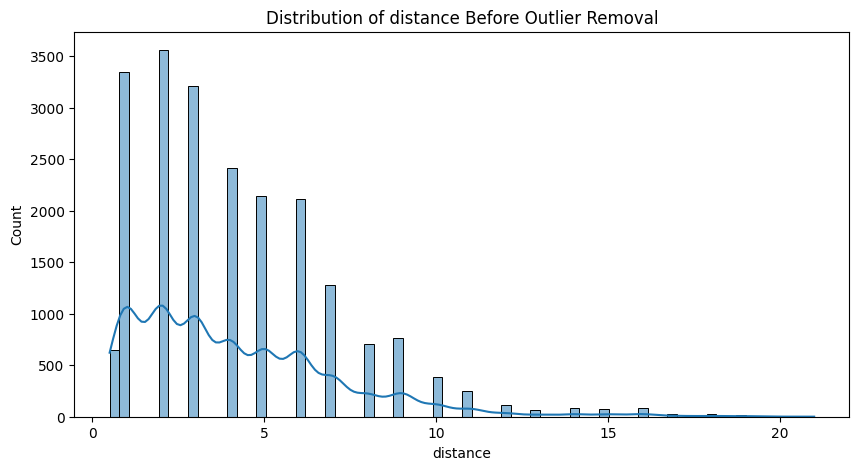

Column 'distance': 314 outliers dropped.


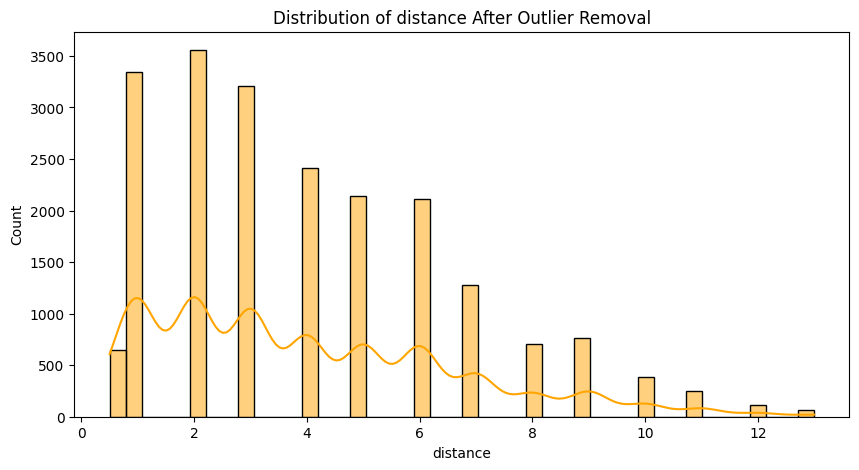

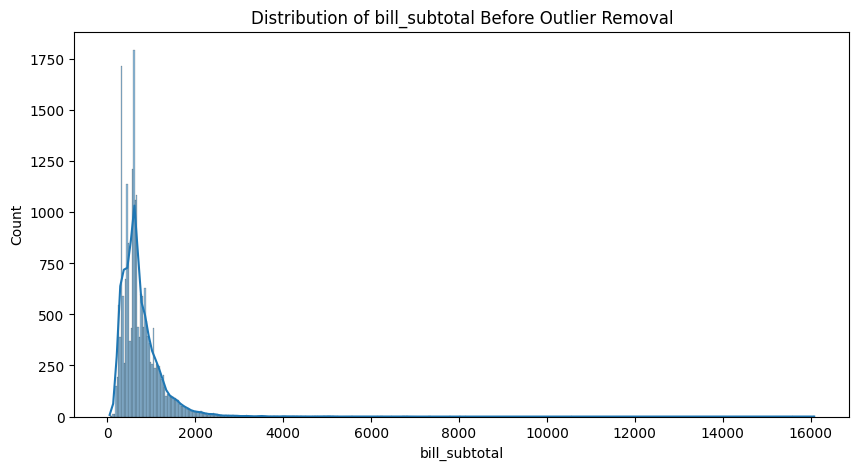

Column 'bill_subtotal': 262 outliers dropped.


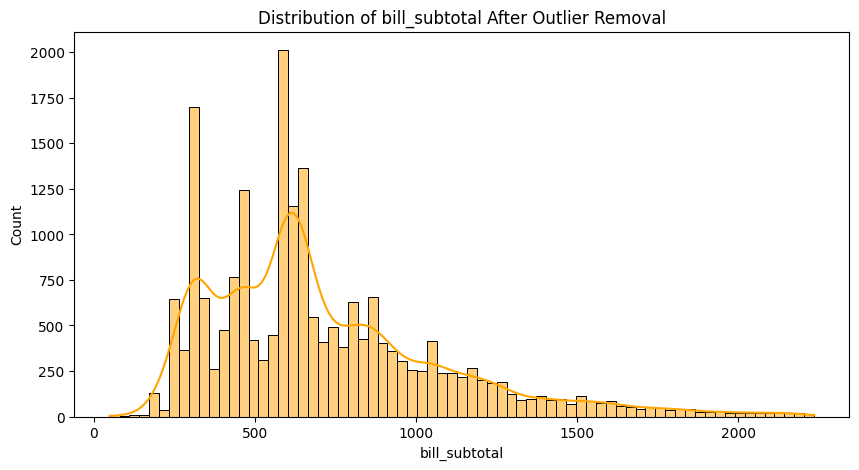

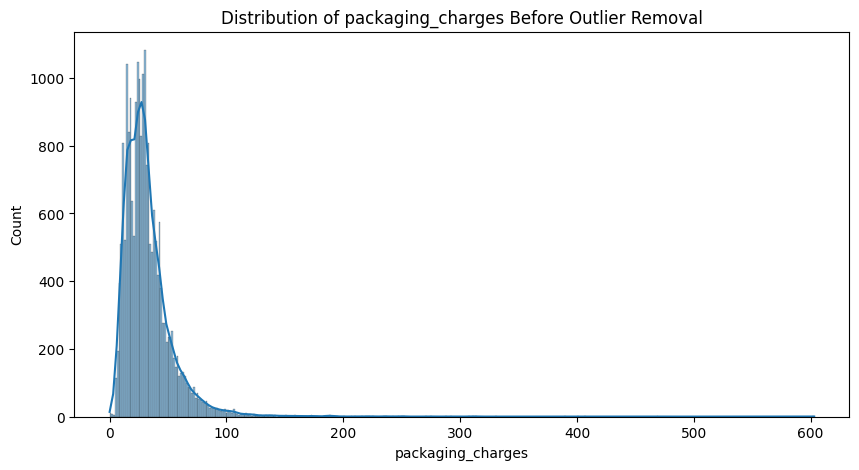

Column 'packaging_charges': 323 outliers dropped.


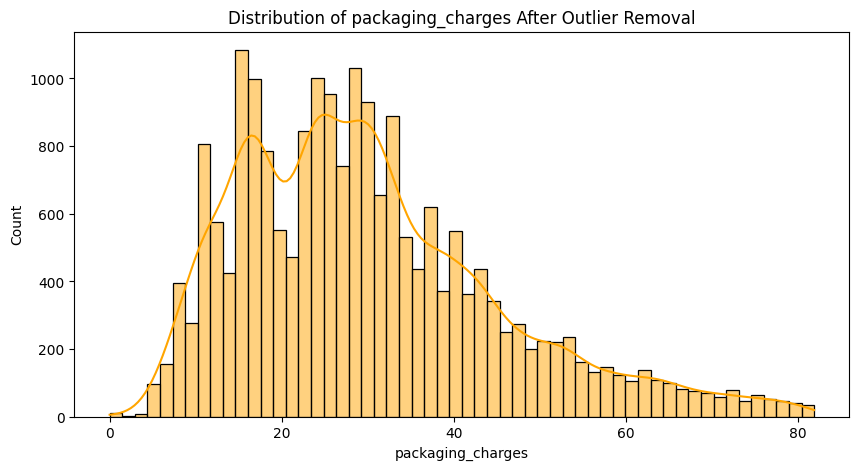

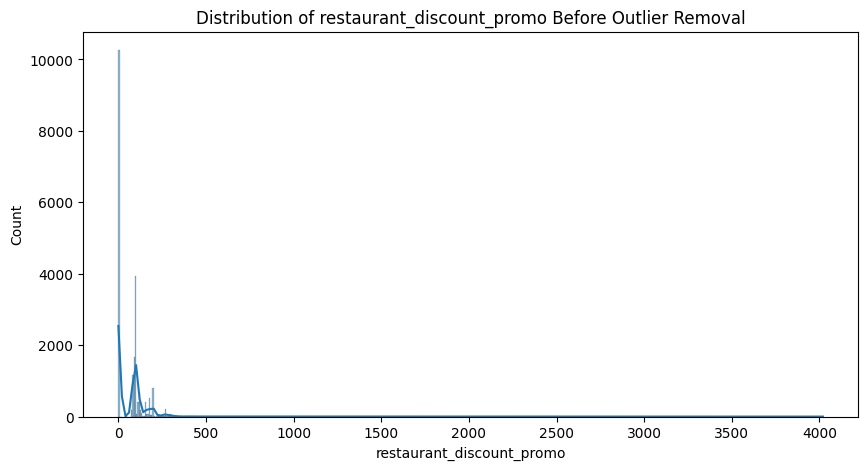

Column 'restaurant_discount_promo': 284 outliers dropped.


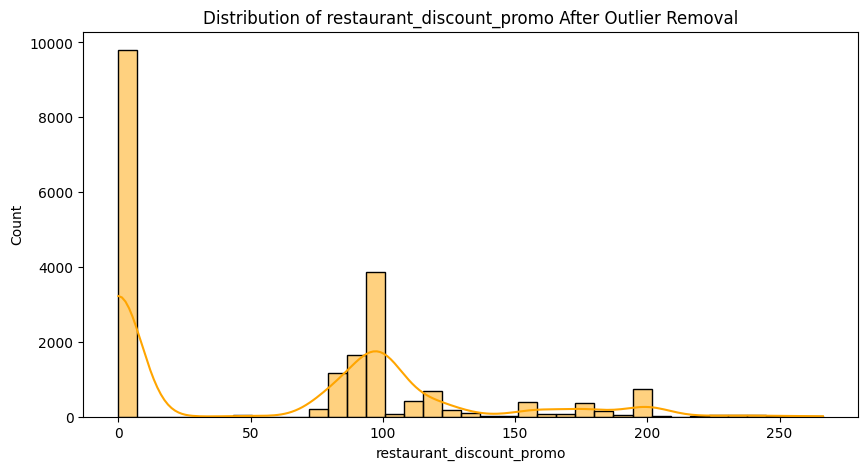

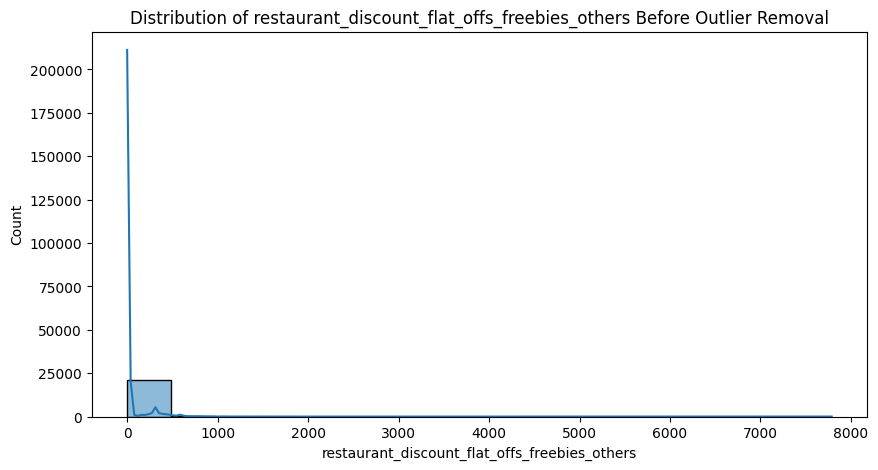

Column 'restaurant_discount_flat_offs_freebies_others': 654 outliers dropped.


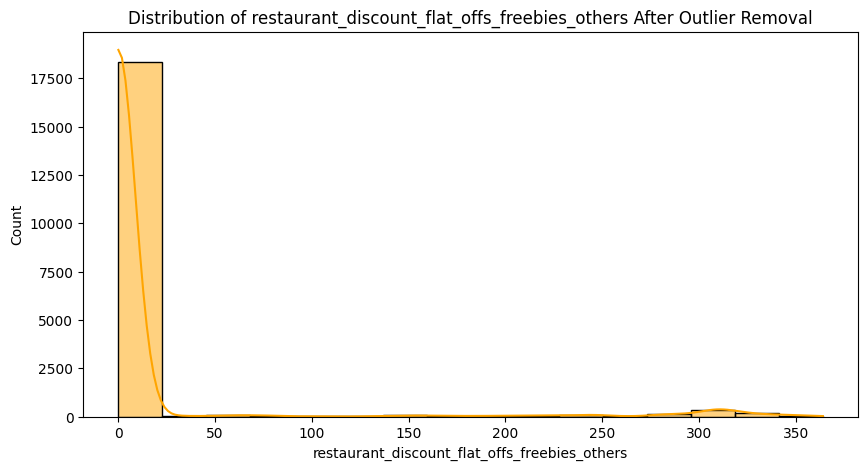

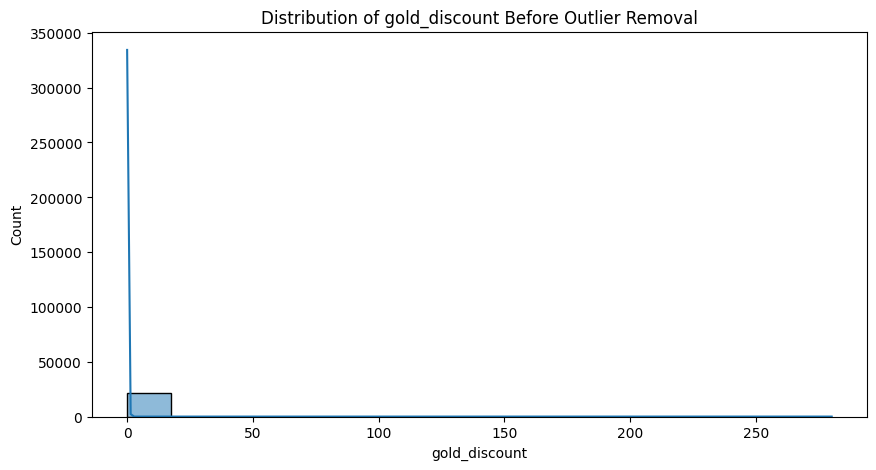

Column 'gold_discount': 27 outliers dropped.


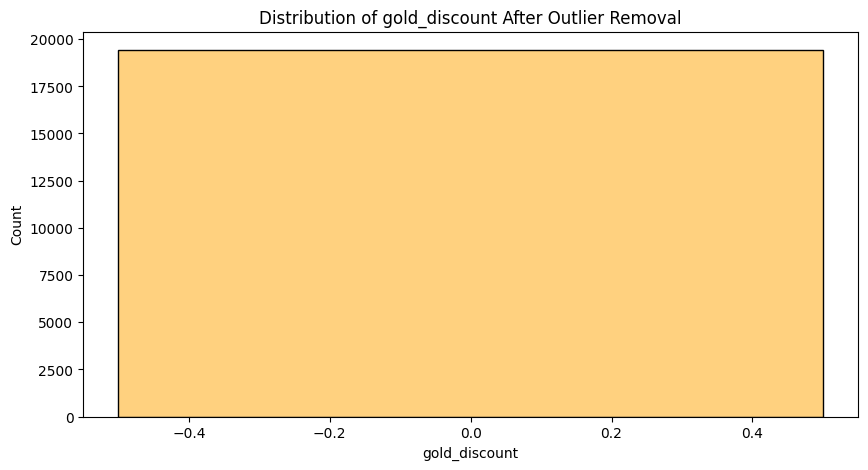

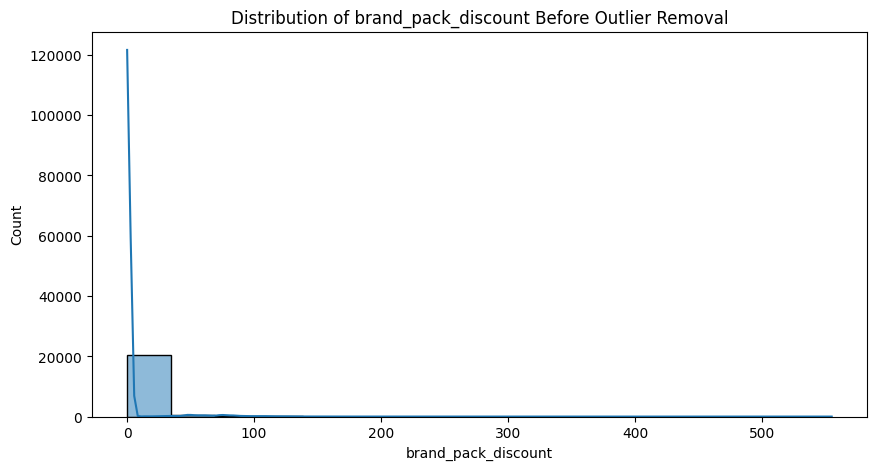

Column 'brand_pack_discount': 625 outliers dropped.


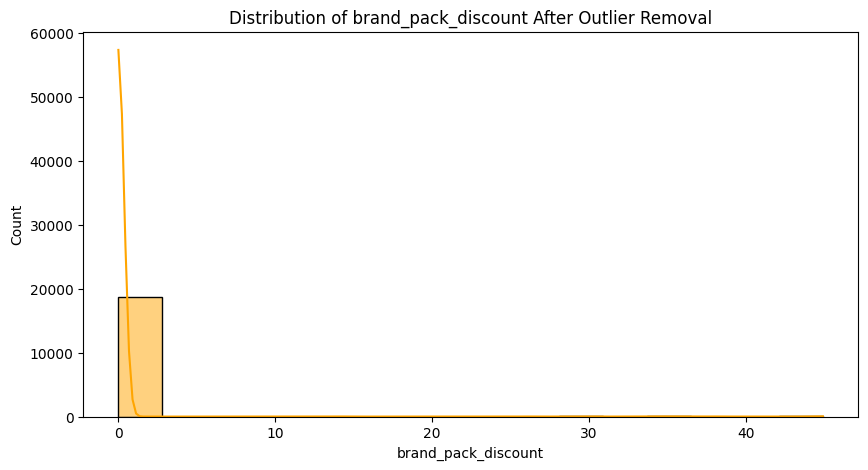

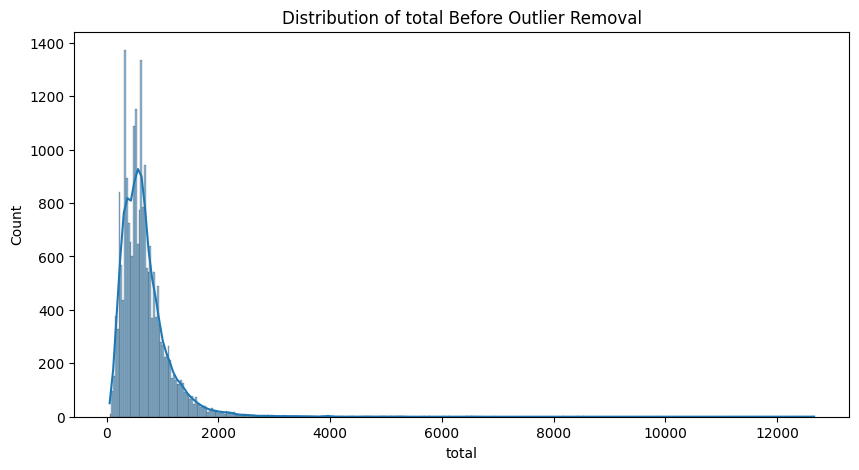

Column 'total': 166 outliers dropped.


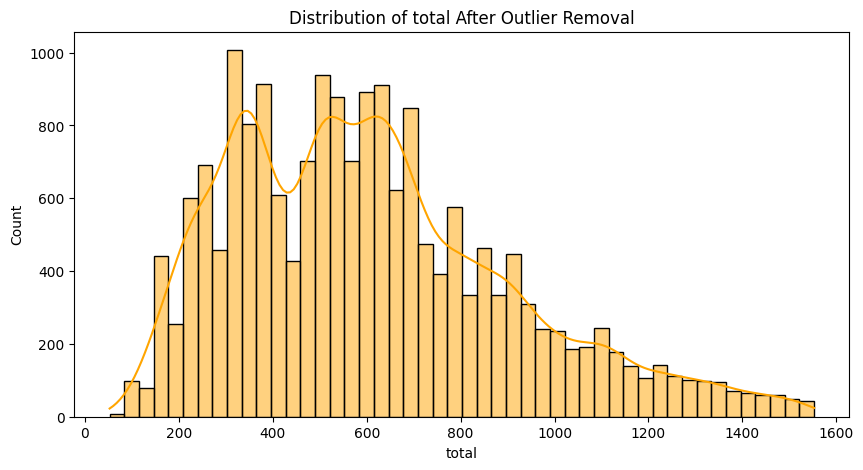

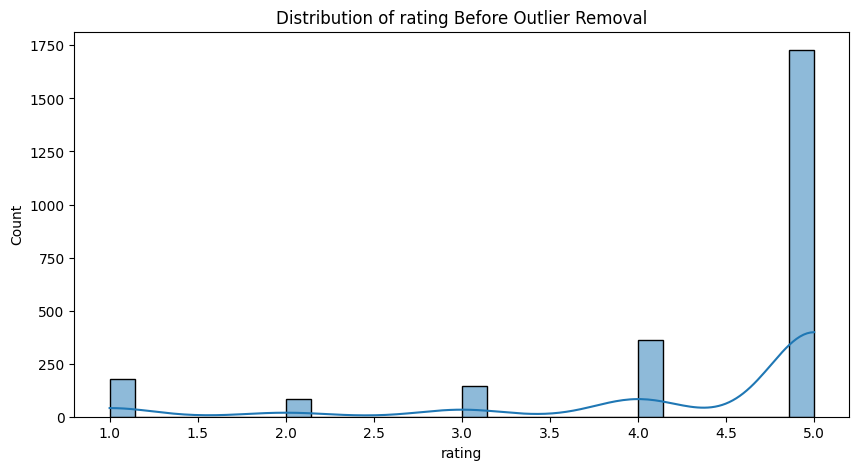

Column 'rating': 16527 outliers dropped.


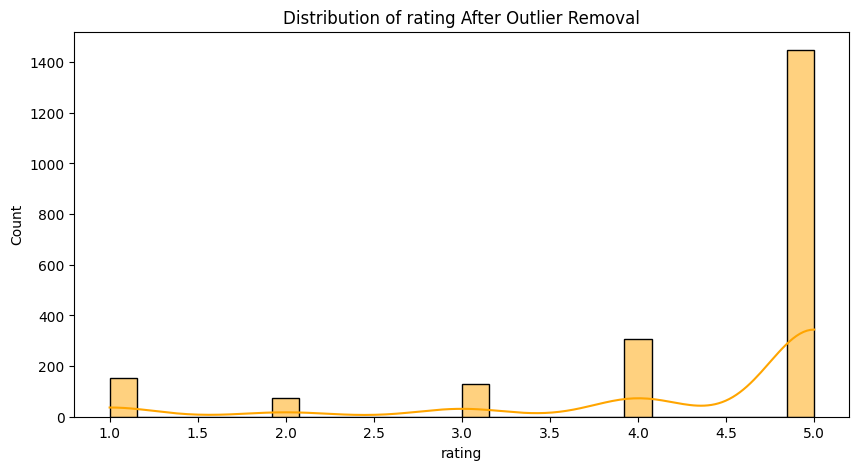

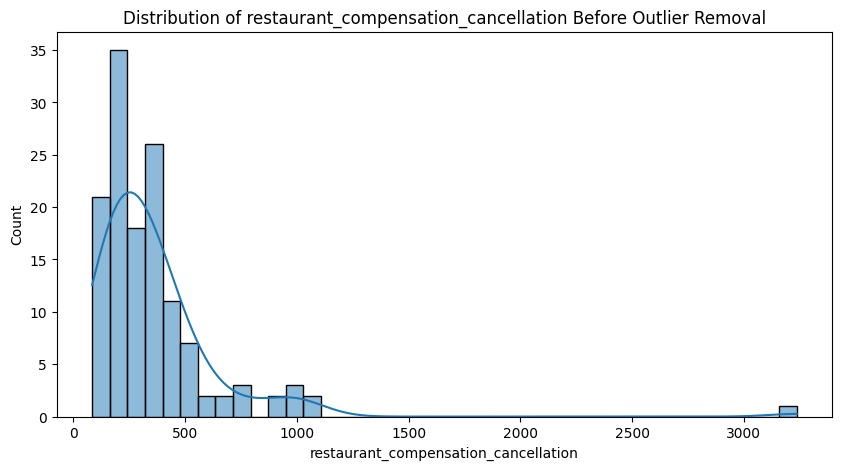

Column 'restaurant_compensation_cancellation': 2111 outliers dropped.


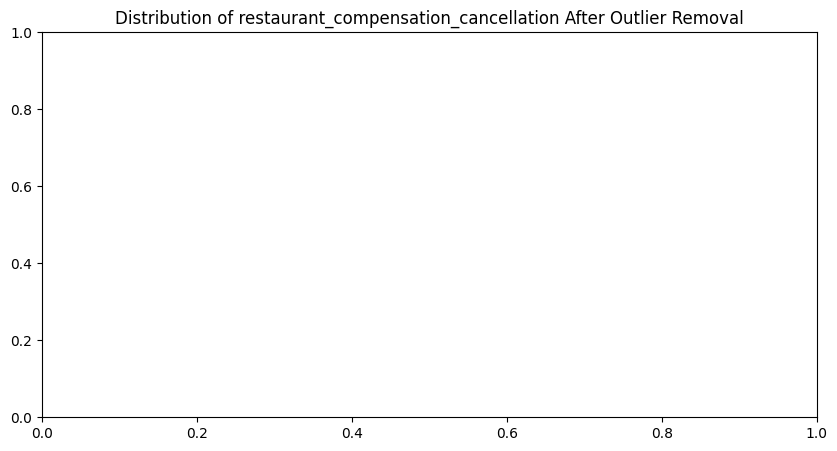

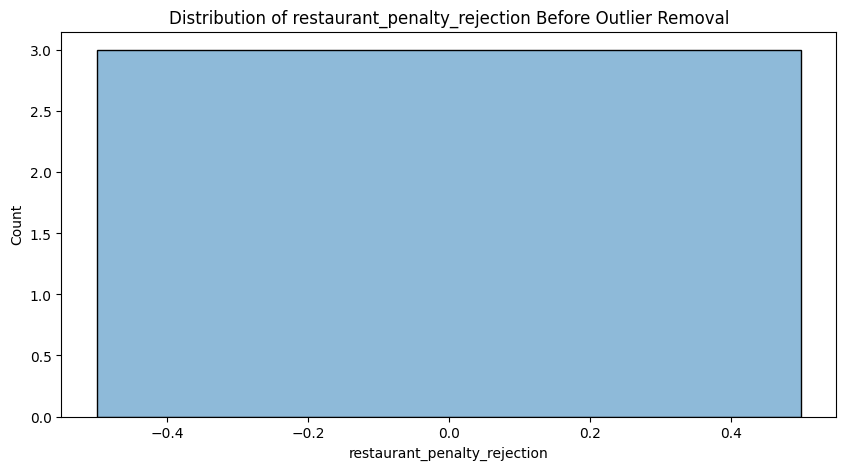

Column 'restaurant_penalty_rejection': 0 outliers dropped.


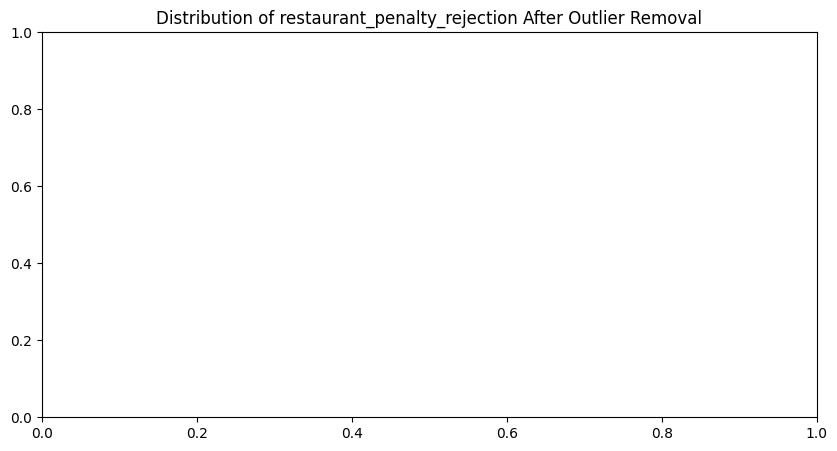

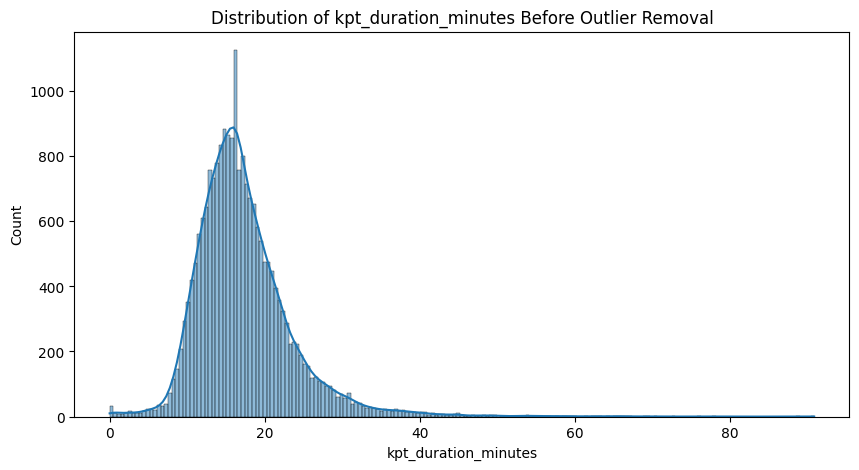

Column 'kpt_duration_minutes': 0 outliers dropped.


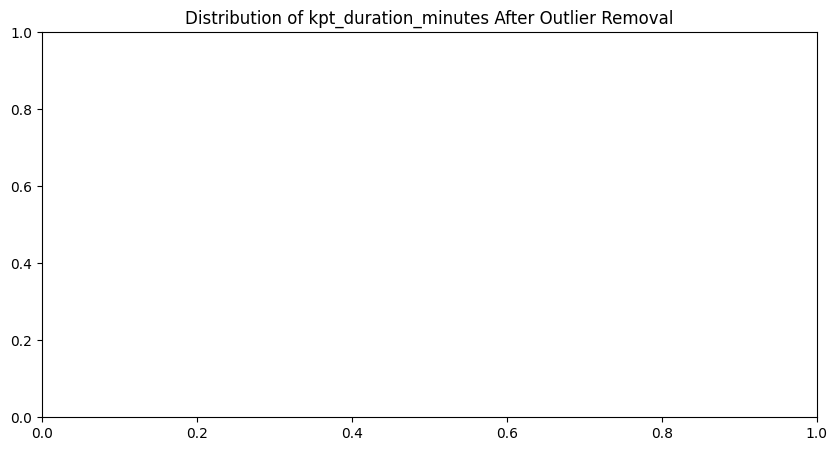

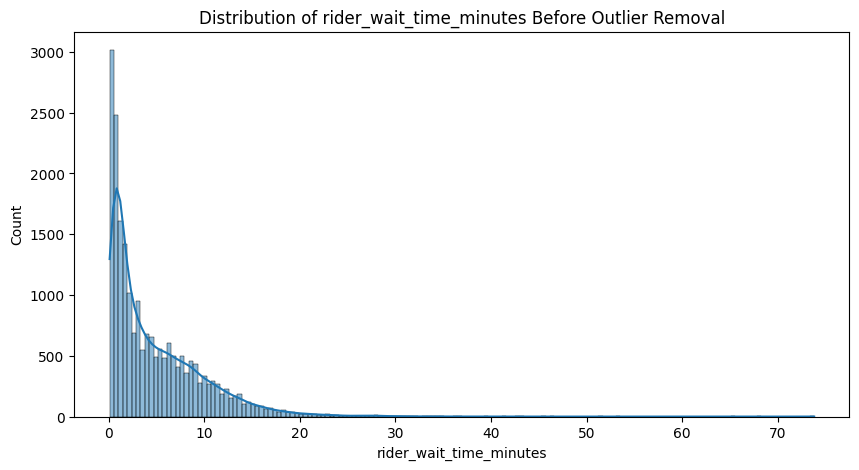

Column 'rider_wait_time_minutes': 0 outliers dropped.


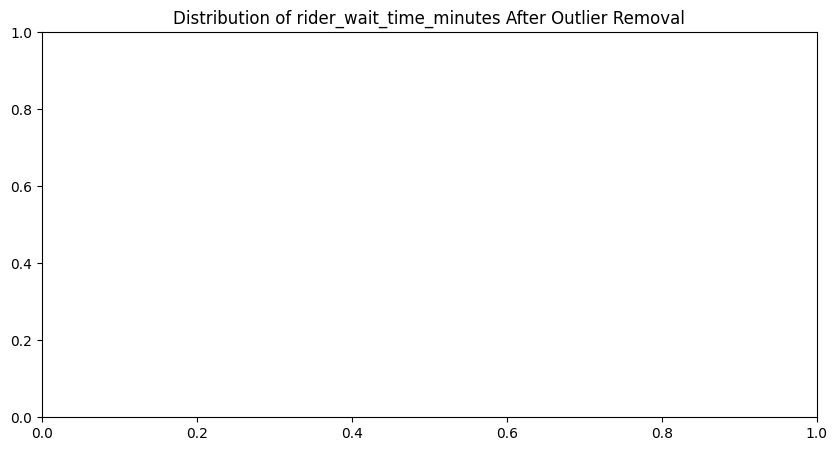

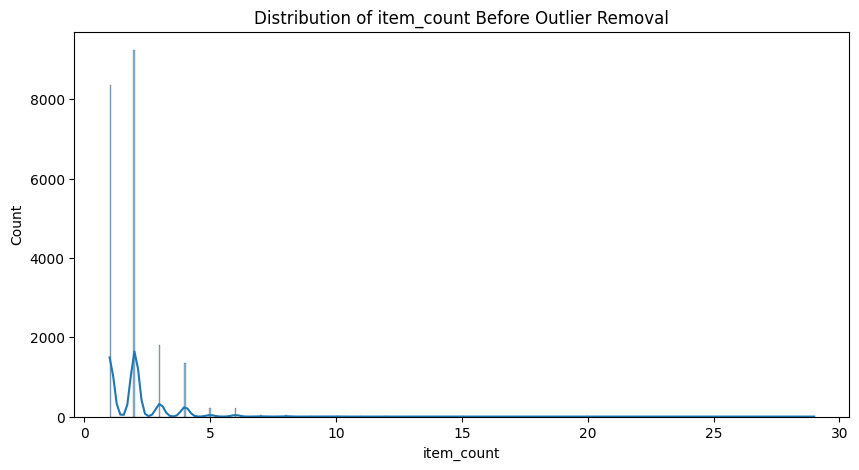

Column 'item_count': 0 outliers dropped.


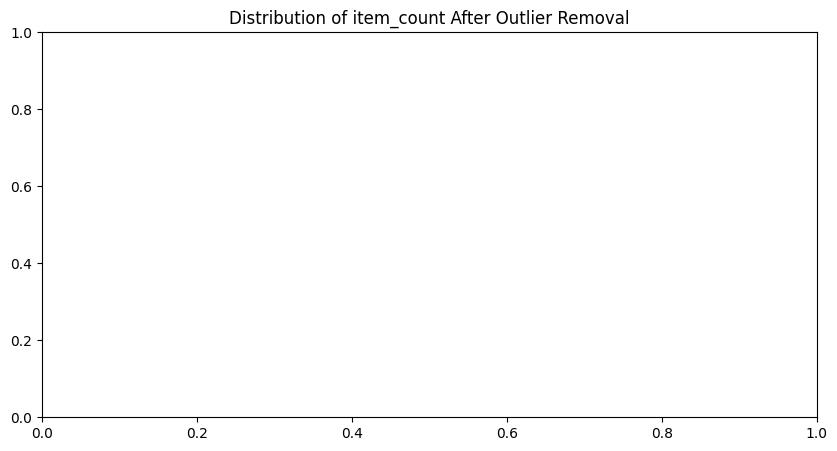

Total outliers dropped from DataFrame: 21321


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def remove_outliers_zscore_with_histograms(df, columns, threshold=3):
    """
    Removes outliers from specified columns of a pandas DataFrame using the z-score method.
    Displays histograms for each column before and after outlier removal.

    Args:
        df (pd.DataFrame): The input DataFrame.
        columns (list): A list of column names to check for outliers.
        threshold (float, optional): The z-score threshold for outlier detection. Defaults to 3.

    Returns:
        pd.DataFrame: A new DataFrame with outliers removed.
    """

    df_clean = df.copy()
    total_dropped = 0

    for col in columns:
        # Before outlier removal
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], label='Before Outlier Removal', kde=True)
        plt.title(f'Distribution of {col} Before Outlier Removal')
        plt.show()

        # Outlier removal
        original_size = len(df_clean)
        z_scores = np.abs((df_clean[col] - df_clean[col].mean()) / df_clean[col].std())
        df_clean = df_clean[z_scores <= threshold]
        dropped_count = original_size - len(df_clean)
        total_dropped += dropped_count
        print(f"Column '{col}': {dropped_count} outliers dropped.")

        # After outlier removal
        plt.figure(figsize=(10, 5))
        sns.histplot(df_clean[col], label='After Outlier Removal', kde=True, color='orange')
        plt.title(f'Distribution of {col} After Outlier Removal')
        plt.show()

    print(f"Total outliers dropped from DataFrame: {total_dropped}")
    return df_clean

# Example usage:
numerical_cols = order_history_df.select_dtypes(include=['number']).columns
order_history_df_clean = remove_outliers_zscore_with_histograms(order_history_df, numerical_cols, threshold=3)

### Columns selection for dropping outliers

In [ ]:
#Based on above observation removing outliers for few columns
columns_for_outlier=["total","gold_discount","bill_subtotal"]
order_history_df_method2 = remove_outliers_zscore(order_history_df, columns_for_outlier, threshold=3)

Column 'total': 296 outliers dropped.
Column 'gold_discount': 27 outliers dropped.
Column 'bill_subtotal': 294 outliers dropped.
Total outliers dropped from DataFrame: 617
